# 1 : Librairies et Options

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import timeit
from PIL import Image

# 2 : Ouverture du fichier

In [3]:
Data = pd.read_csv('DonneesP4nettoyees')

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 48 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   BuildingType                                         1492 non-null   object 
 1   PrimaryPropertyType                                  1492 non-null   object 
 2   CouncilDistrictCode                                  1492 non-null   int64  
 3   YearBuiltDec                                         1492 non-null   int64  
 4   Neighborhood                                         1492 non-null   object 
 5   YearBuilt                                            1492 non-null   int64  
 6   NumberofBuildings                                    1492 non-null   int64  
 7   NumberofFloors                                       1492 non-null   int64  
 8   PropertyGFATotal                                     1492 non-null  

# 3 : Analyse Univariée sur les données de conso

In [5]:
Consommation = ['SiteEUIWN(kBtu/sf)', 'SteamUse(kBtu/sf)', 'Electricity(kBtu/sf)', 'NaturalGas(kBtu/sf)', 'GHGEmissionsIntensity']

In [6]:
# Describe Global de la consommation énergétique:
Data[Consommation].describe()

,SiteEUIWN(kBtu/sf),SteamUse(kBtu/sf),Electricity(kBtu/sf),NaturalGas(kBtu/sf),GHGEmissionsIntensity
count,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000
mean,71.953348,1.672427,42.611345,19.451838,1.459283
std,57.710851,8.376807,37.780981,28.136902,1.676760
min,1.500000,0.000000,0.000130,0.000000,0.010000
25%,37.175000,0.000000,19.108722,0.000000,0.350000
50%,55.900002,0.000000,33.704492,9.076137,0.855000
75%,86.699997,0.000000,51.723323,26.207463,1.890000
max,385.600006,119.558115,389.777851,168.669886,10.100000


# 4 : Analyse Multivariée

## 4.1 : Modification de certaines colonnes pour analyses

In [7]:
Data.head()

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuiltDec,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),...,Refrigerated Warehouse (%),Bank Branch (%),Manufacturing/Industrial Plant (%),Hospital (General Medical & Surgical) (%),"Repair Services (Vehicle, Shoe, Locksmith, etc) (%)",Financial Office (%),Automobile Dealership (%),Strip Mall (%),Other - Lodging/Residential (%),Other/Specialty Hospital (%)
0,NonResidential,Hotel,7,1920,DOWNTOWN,1927,1,12,11.390023,11.390023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NonResidential,Hotel,7,1990,DOWNTOWN,1996,1,11,11.547974,11.390792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NonResidential,Hotel,7,1960,DOWNTOWN,1969,1,41,13.770629,13.540275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NonResidential,Hotel,7,1920,DOWNTOWN,1926,1,10,11.023878,11.023878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NonResidential,Hotel,7,1980,DOWNTOWN,1980,1,18,12.075856,11.640272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4.2 : Etude de la corrélation de certaines variables entre elles

In [11]:
Variables = ['YearBuiltDec','PropertyGFATotal', 'NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)','SteamUse(kBtu/sf)', 'Electricity(kBtu/sf)', 'NaturalGas(kBtu/sf)', 'GHGEmissionsIntensity']

In [12]:
# Corrélation de certaines variables vs le reste des variables :
X = Data[Variables].corr()['YearBuiltDec'].sort_values(ascending = False).to_frame().reset_index().rename(columns = {'index' : 'VsYerBuilt'})
Z = Data[Variables].corr()['ENERGYSTARScore'].sort_values(ascending = False).to_frame().reset_index().rename(columns = {'index' : 'VsNRJStars'})
AA = Data[Variables].corr()['NumberofBuildings'].sort_values(ascending = False).to_frame().reset_index().rename(columns = {'index' : 'VsBuildings'})
AB = Data[Variables].corr()['NumberofFloors'].sort_values(ascending = False).to_frame().reset_index().rename(columns = {'index' : 'VsFloors'})


Corr = pd.merge(X, Z, left_index = True, right_index = True)
Corr = pd.merge(Corr, AA, left_index = True, right_index = True)
Corr = pd.merge(Corr, AB, left_index = True, right_index = True)
Corr

,VsYerBuilt,YearBuiltDec,VsNRJStars,ENERGYSTARScore,VsBuildings,NumberofBuildings,VsFloors,NumberofFloors
0,YearBuiltDec,1.000000,ENERGYSTARScore,1.000000,NumberofBuildings,1.000000,NumberofFloors,1.000000
1,PropertyGFATotal,0.270796,PropertyGFATotal,0.169447,PropertyGFATotal,0.183545,PropertyGFATotal,0.554584
2,SiteEUIWN(kBtu/sf),0.168749,NumberofFloors,0.141836,Electricity(kBtu/sf),0.053050,ENERGYSTARScore,0.141836
3,Electricity(kBtu/sf),0.165281,YearBuiltDec,-0.041643,GHGEmissionsIntensity,0.051063,SteamUse(kBtu/sf),0.138110
4,NumberofFloors,0.103935,SteamUse(kBtu/sf),-0.045395,SiteEUIWN(kBtu/sf),0.047191,YearBuiltDec,0.103935
5,GHGEmissionsIntensity,0.006683,NumberofBuildings,-0.060146,SteamUse(kBtu/sf),0.047122,Electricity(kBtu/sf),0.026719
6,NaturalGas(kBtu/sf),0.002094,NaturalGas(kBtu/sf),-0.278842,NaturalGas(kBtu/sf),0.027521,SiteEUIWN(kBtu/sf),-0.002099
7,NumberofBuildings,-0.025677,GHGEmissionsIntensity,-0.328319,NumberofFloors,-0.015311,NumberofBuildings,-0.015311
8,ENERGYSTARScore,-0.041643,Electricity(kBtu/sf),-0.432196,YearBuiltDec,-0.025677,GHGEmissionsIntensity,-0.058273
9,SteamUse(kBtu/sf),-0.054904,SiteEUIWN(kBtu/sf),-0.456401,ENERGYSTARScore,-0.060146,NaturalGas(kBtu/sf),-0.129868


- **Les variables Year, NRJStars et Nb of Building ne sont pa corrélée aux autres variables.**
- **La variable Nb floor est elle corrélée à la surface total de bulding et de parking ce qui est logique, mais pas à la quantité d'énergie consommée.**
- **Légére corrélation entre le Nb d'étage et le distict code, comme on l'a vu sur la carte les buildings sont surtout au centre ville, idem vs quartier.**

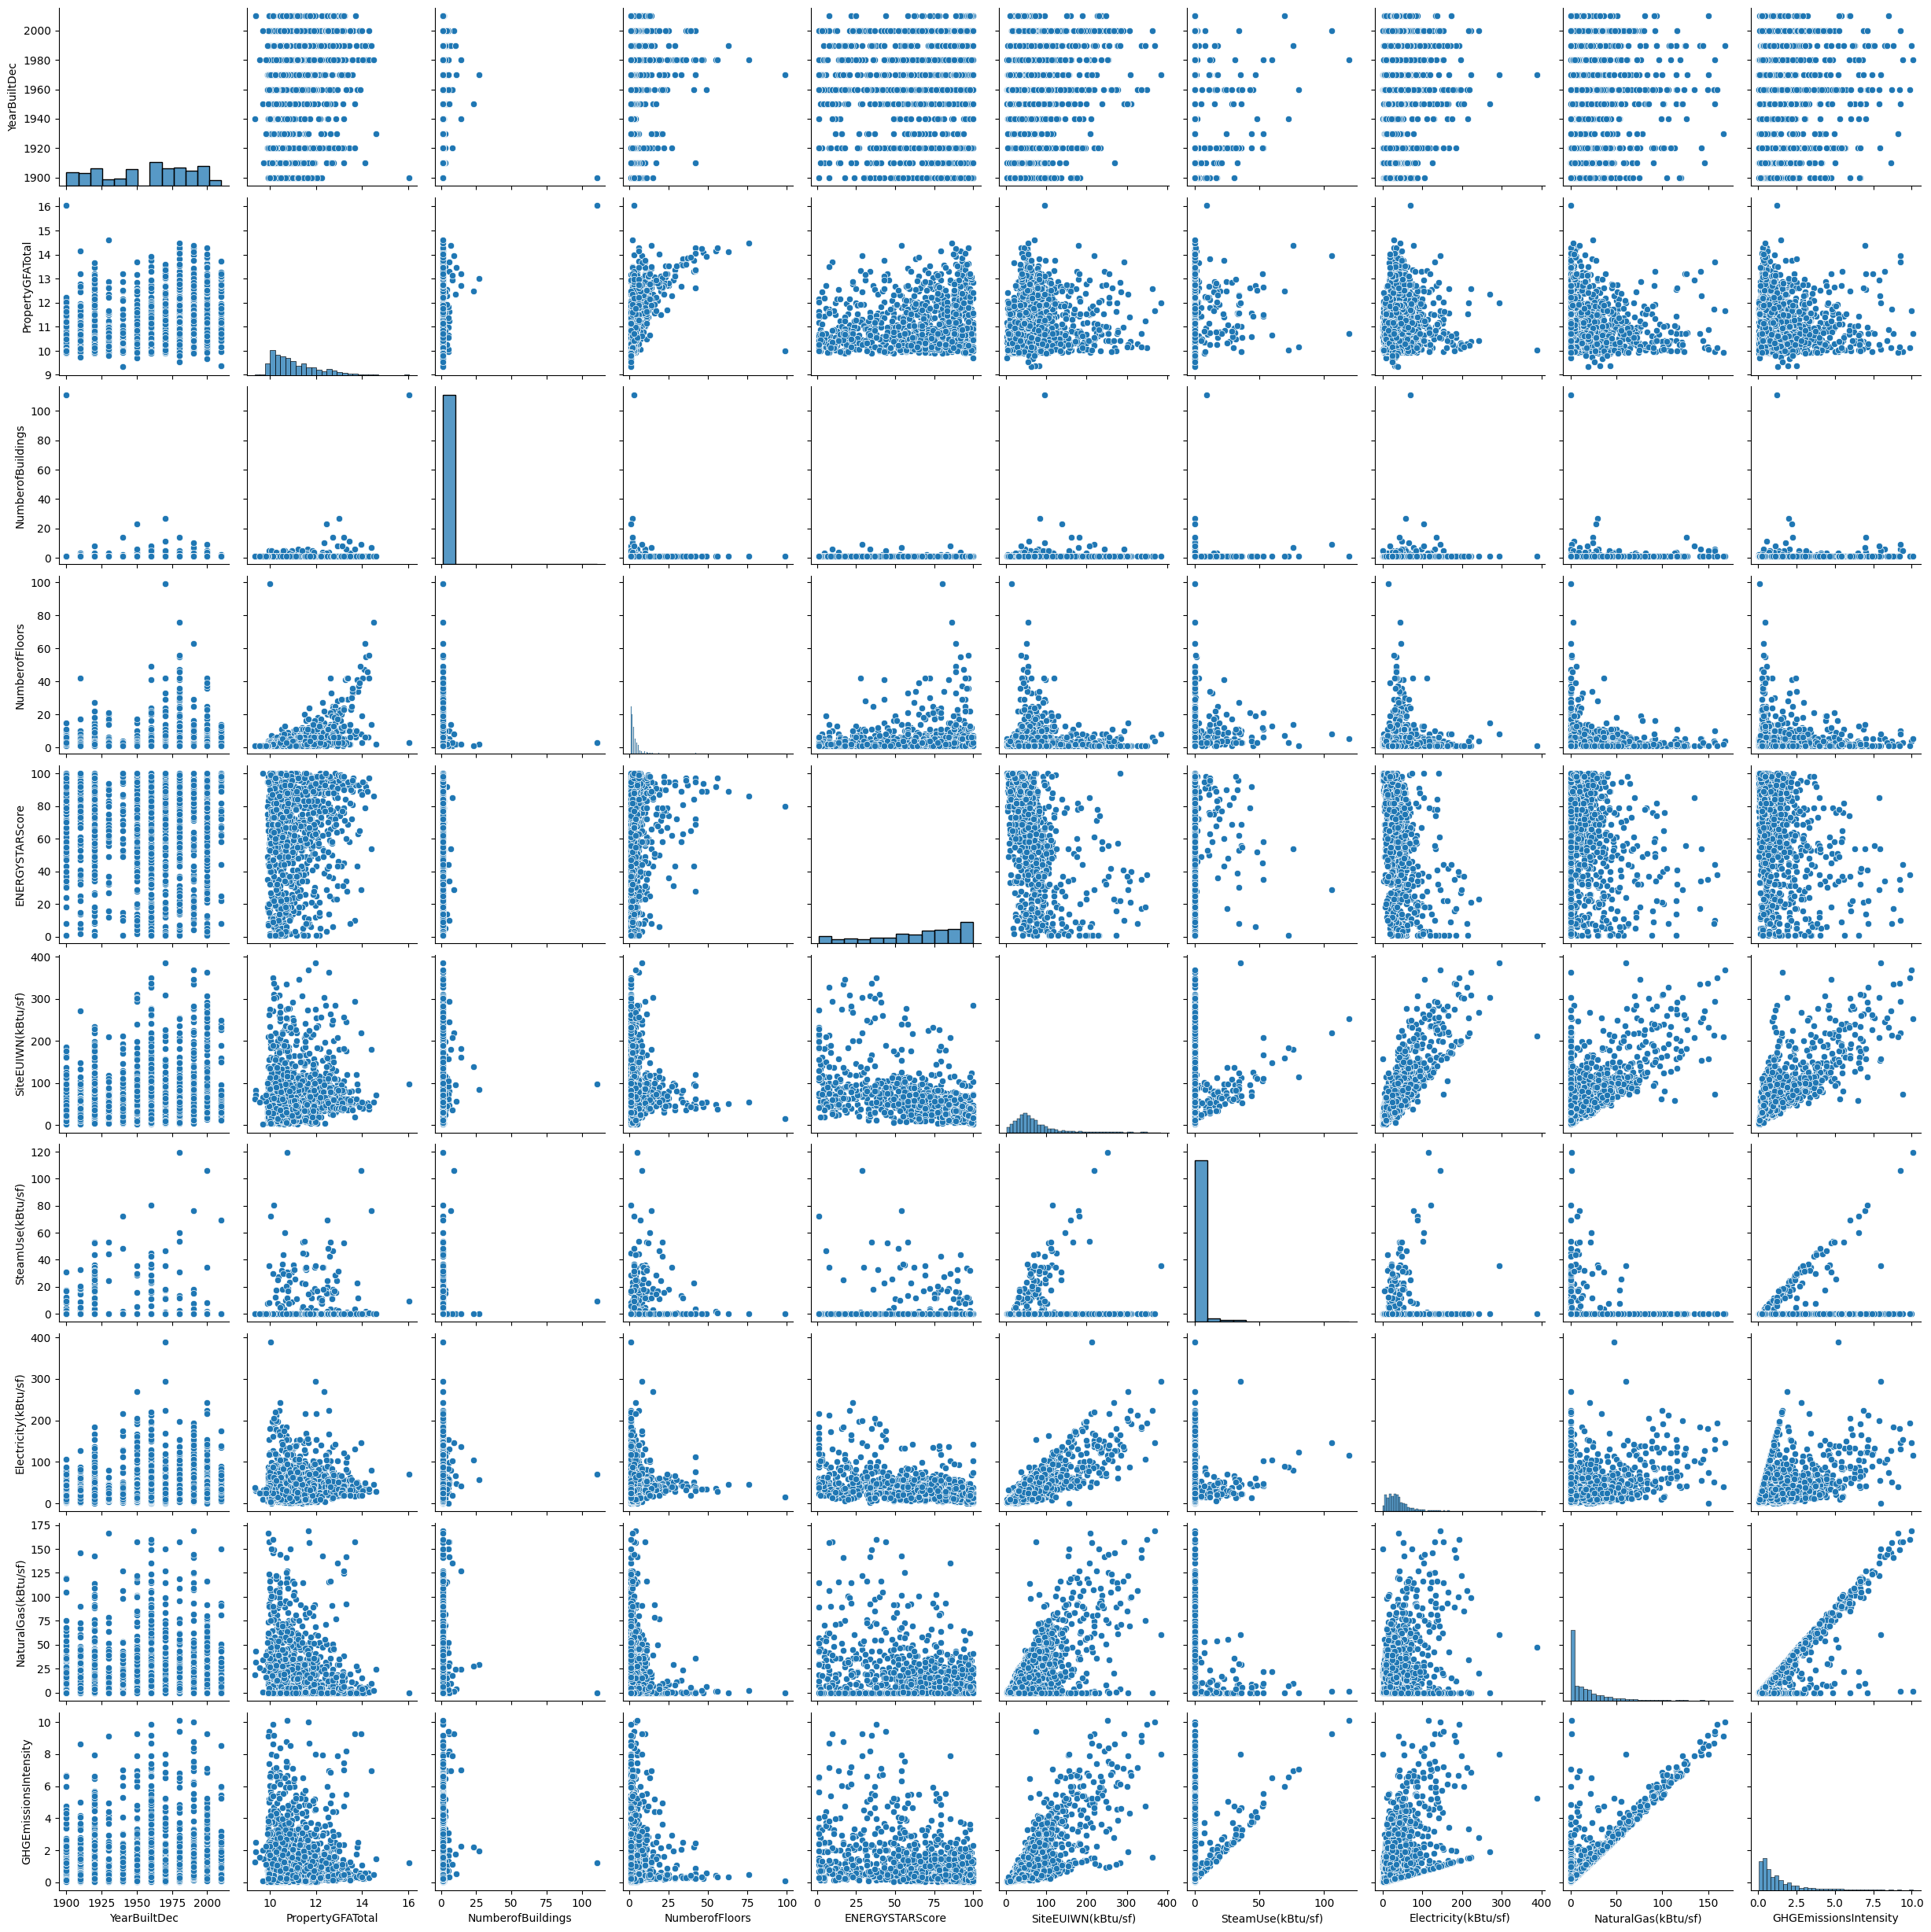

In [13]:
# Pairplot :
sns.pairplot(Data[Variables])
plt.show()

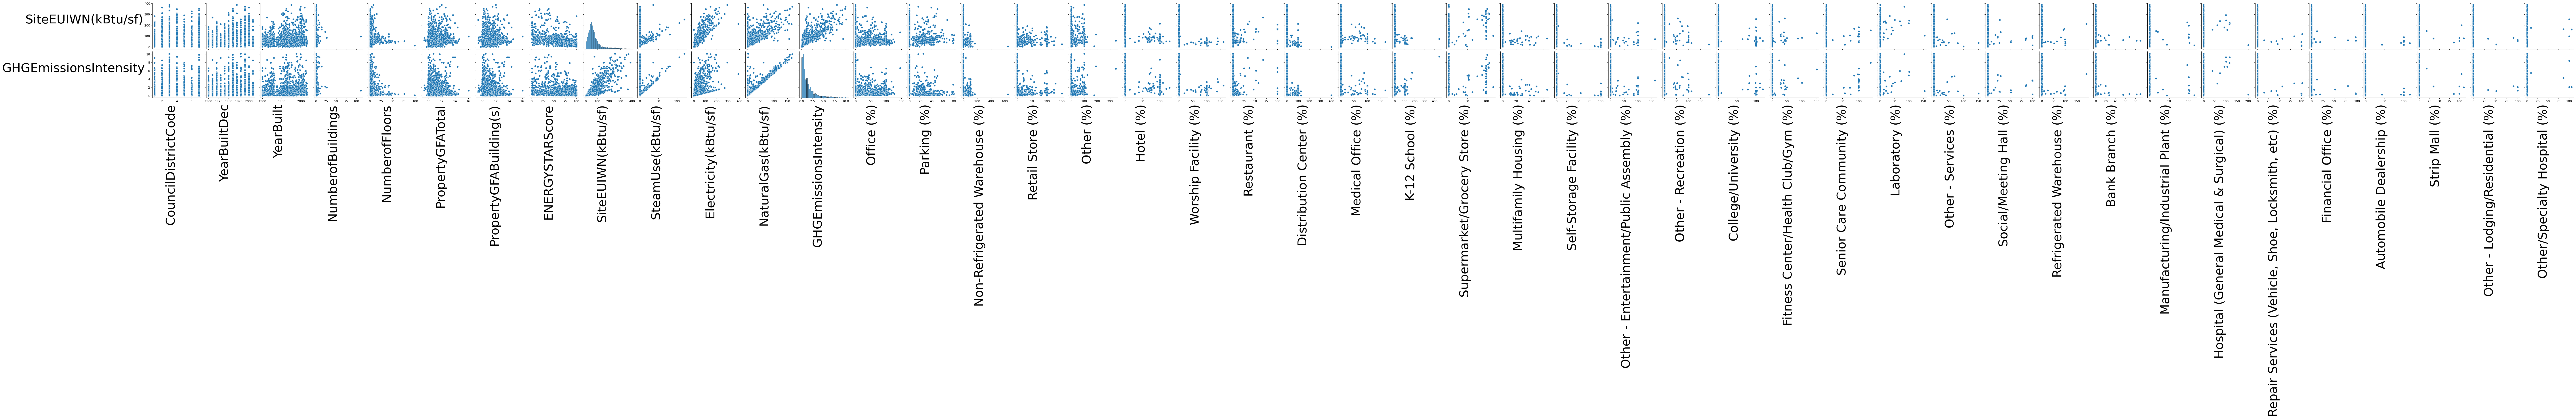

In [14]:
# Pairplot :
g = sns.pairplot(Data, y_vars = ['SiteEUIWN(kBtu/sf)', 'GHGEmissionsIntensity'])
for axes in g.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right', size = 40)
    axes.set_xlabel(axes.get_xlabel(), rotation=90, horizontalalignment='right', size = 40)
plt.show()

- **Les variables les plus corrélées avec les deux targets sont les variables de conso energétiques.**

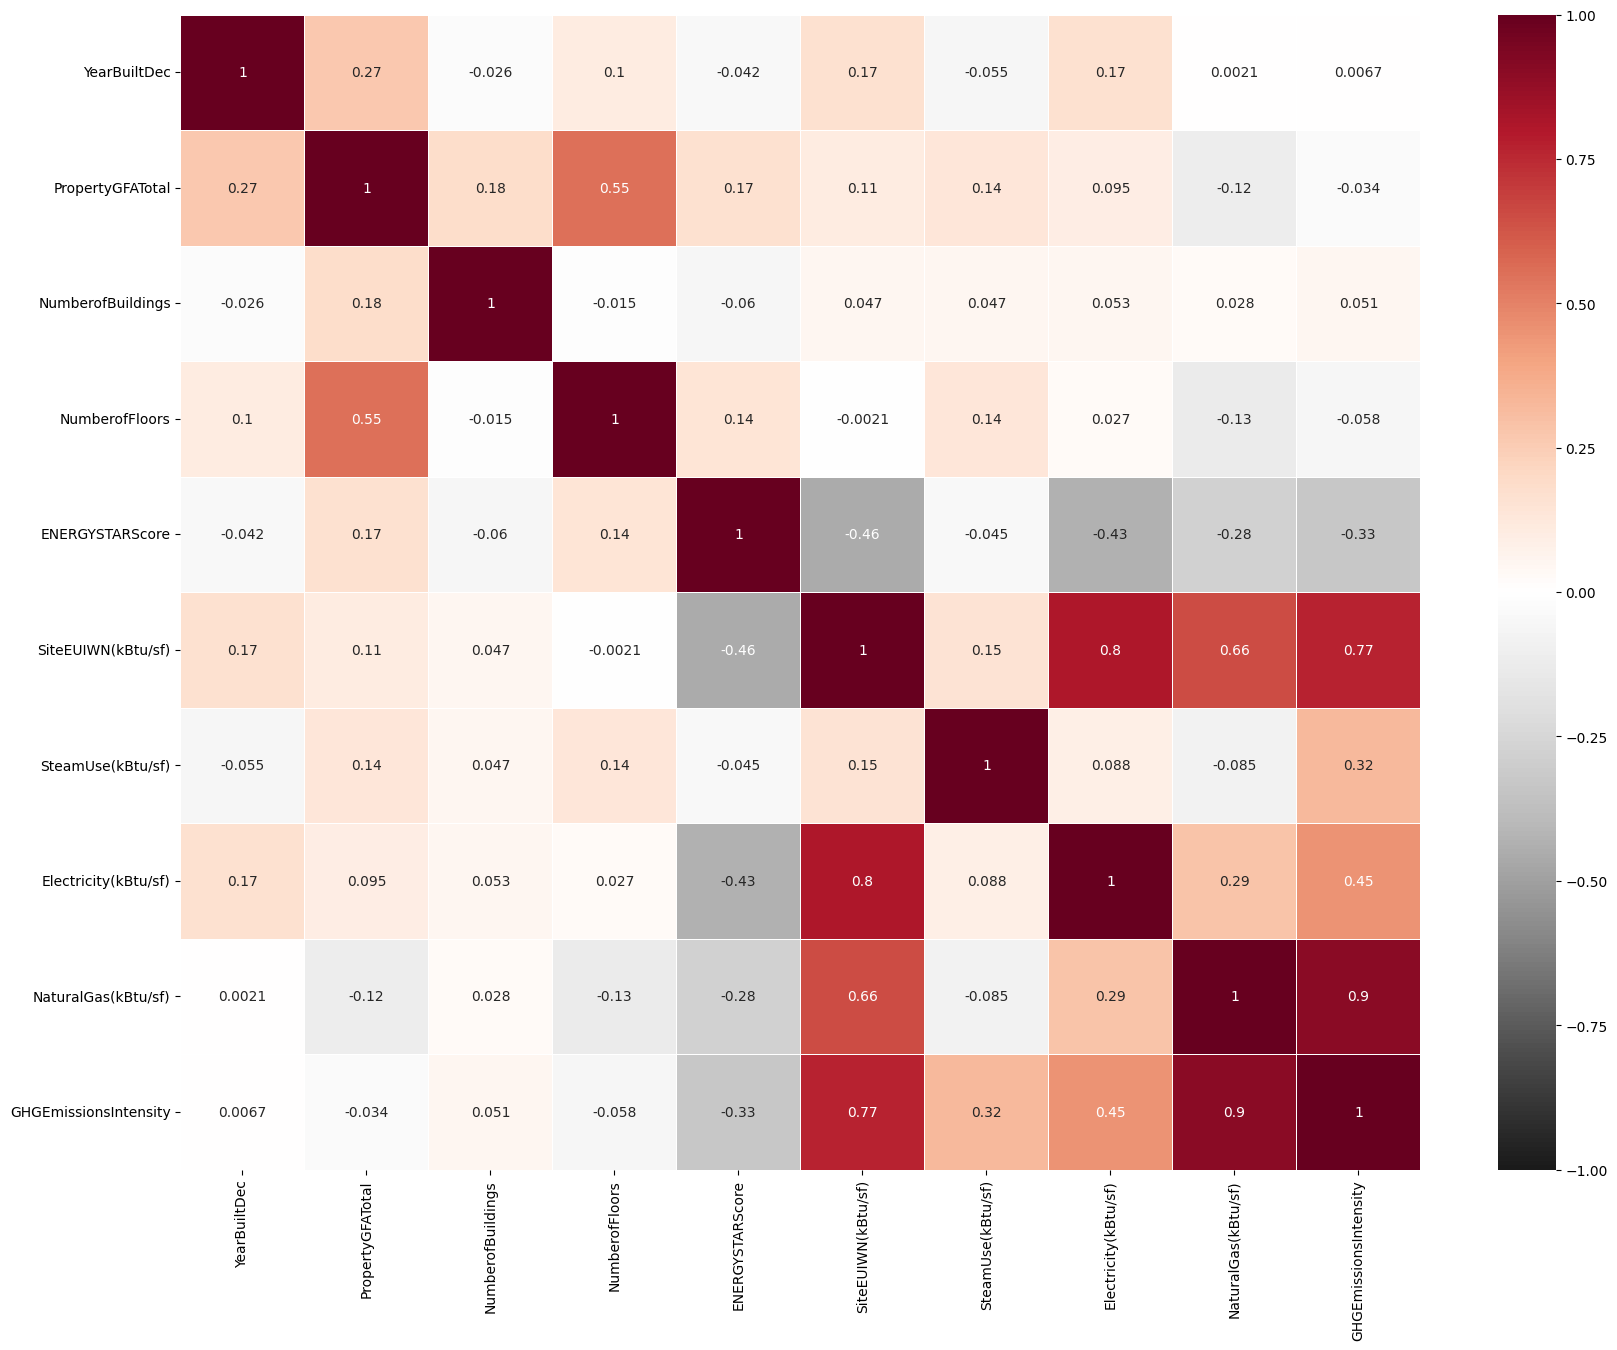

In [15]:
# Heatmap de corrélation :
plt.subplots(figsize = (20,15))
sns.heatmap(Data[Variables].corr(), vmin = -1, vmax = 1, linewidth = 0.5, annot = True, cmap = "RdGy_r")
plt.show()

- **Les variables surfaces totales, surfaces de parkings et surfaces de buldings ne sont corréllées que entre elles ce qui est logique vu que les autres variable sont divisées par la surface.**
- **Le ENERGY STAR Score est corrélée à rien.**
- **Le Steam Use est peut corrélé.**
- **Les autres variables sont corréllée entre elles à différents niveaux.**

## 4.3 : Cercle des corrélations

In [16]:
# Création des variables:
X = Data[['YearBuiltDec','PropertyGFATotal', 'NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'SteamUse(kBtu/sf)', 'Electricity(kBtu/sf)', 'NaturalGas(kBtu/sf)', 'PourcentageParking','Surfacereel']]
X = X.dropna()

KeyError: "['PourcentageParking', 'Surfacereel'] not in index"

In [ ]:
# Standardisation des données : 
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler2.fit(X)
X_scaled = scaler2.transform(X)
X_scaled.shape

In [ ]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

In [ ]:
# Garder les variables les plus impactantes :
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.8)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

In [ ]:
pca.explained_variance_ratio_

In [ ]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, 7)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [ ]:
features = X.columns
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

In [ ]:
x, y = 0,1

fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

# 5 : Prédictions tests sur les variables consommations : 

In [ ]:
# Création des variables:
X = Data[['SteamUse(kBtu/sf)', 'Electricity(kBtu/sf)','NaturalGas(kBtu/sf)']]
y = Data['SiteEUIWN(kBtu/sf)']

In [ ]:
# Standardisation des données : 
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler2.fit(X)
X_scaled = scaler2.transform(X)
X_scaled.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.75)

## 5.1 : Prédictions sur modèles naifs

In [ ]:
import sklearn.metrics as metrics

y_pred_random_test = np.random.randint(np.min(y), np.max(y), y_test.shape)
y_pred_random_train = np.random.randint(np.min(y), np.max(y), y_train.shape)

RMSEtest = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_random_test)),2)
RMSEtrain = round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_random_train)),2)
Rsquaretest = metrics.r2_score(y_test, y_pred_random_test).round(4)
Rsquaretrain = metrics.r2_score(y_train, y_pred_random_train).round(4)

print("RMSE test : {:.2f}".format(RMSEtest))
print("R² test : {}".format(Rsquaretest))
print("RMSE train : {:.2f}".format(RMSEtrain))
print("R² train : {}".format(Rsquaretrain))

df = pd.DataFrame(zip([RMSEtest],[Rsquaretest]), index = ['Random'], columns = ['RMSE', 'R²'])

In [ ]:
from sklearn import dummy

dum = dummy.DummyRegressor(strategy = 'mean')
dum.fit(X_train, y_train)
y_pred_dum_test = dum.predict(X_test)
y_pred_dum_train = dum.predict(X_train)

RMSEtest = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum_test)),2)
RMSEtrain = round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_dum_train)),2)
Rsquaretest = metrics.r2_score(y_test, y_pred_dum_test).round(4)
Rsquaretrain = metrics.r2_score(y_train, y_pred_dum_train).round(4)

print("RMSE test : {:.2f}".format(RMSEtest))
print("R² test : {}".format(Rsquaretest))
print("RMSE train : {:.2f}".format(RMSEtrain))
print("R² train : {}".format(Rsquaretrain))

Row = pd.DataFrame(zip([RMSEtest],[Rsquaretest]), index = ['Dummy'], columns = ['RMSE', 'R²'])
df = pd.concat([df,Row])

## 5.2 : Prédictions sur modèle LR

In [ ]:
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression().fit(X_train, y_train)
y_pred_LR_test = modelLR.predict(X_test)
y_pred_LR_train = modelLR.predict(X_train)

RMSEtest = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR_test)),2)
RMSEtrain = round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_LR_train)),2)
Rsquaretest = metrics.r2_score(y_test, y_pred_LR_test).round(4)
Rsquaretrain = metrics.r2_score(y_train, y_pred_LR_train).round(4)

print("RMSE test : {:.2f}".format(RMSEtest))
print("R² test : {}".format(Rsquaretest))
print("RMSE train : {:.2f}".format(RMSEtrain))
print("R² train : {}".format(Rsquaretrain))

Row = pd.DataFrame(zip([RMSEtest],[Rsquaretest]), index = ['Linear Regression'], columns = ['RMSE', 'R²'])
df = pd.concat([df,Row])

## 5.3 : Prédiction sur modèle DT

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dico = {'max_depth' : range(2,15)}

modelDT = GridSearchCV(DecisionTreeRegressor(), dico, cv = 5, refit=True, verbose=True).fit(X_train, y_train)
y_pred_DT_test = modelDT.predict(X_test)
y_pred_DT_train = modelDT.predict(X_train)

RMSEtest = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT_test)),2)
RMSEtrain = round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_DT_train)),2)
Rsquaretest = metrics.r2_score(y_test, y_pred_DT_test).round(4)
Rsquaretrain = metrics.r2_score(y_train, y_pred_DT_train).round(4)

print("RMSE test : {:.2f}".format(RMSEtest))
print("R² test : {}".format(Rsquaretest))
print("RMSE train : {:.2f}".format(RMSEtrain))
print("R² train : {}".format(Rsquaretrain))

Row = pd.DataFrame(zip([RMSEtest],[Rsquaretest]), index = ['Decision Tree'], columns = ['RMSE', 'R²'])
df = pd.concat([df,Row])

## 5.4 : Prédiction sur modèle KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

dico = {'n_neighbors' : range(2,20), 'weights' : ['uniform', 'distance']}

modelKNN = GridSearchCV(KNeighborsRegressor(), dico, cv = 5, refit=True, verbose=True).fit(X_train, y_train)
y_pred_KNN_test = modelKNN.predict(X_test)
y_pred_KNN_train = modelKNN.predict(X_train)

RMSEtest = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN_test)),2)
RMSEtrain = round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_KNN_train)),2)
Rsquaretest = metrics.r2_score(y_test, y_pred_KNN_test).round(4)
Rsquaretrain = metrics.r2_score(y_train, y_pred_KNN_train).round(4)

print("RMSE test : {:.2f}".format(RMSEtest))
print("R² test : {}".format(Rsquaretest))
print("RMSE train : {:.2f}".format(RMSEtrain))
print("R² train : {}".format(Rsquaretrain))

Row = pd.DataFrame(zip([RMSEtest],[Rsquaretest]), index = ['K Neighbors'], columns = ['RMSE', 'R²'])
df = pd.concat([df,Row])

## 5.5 : Prédiction sur modèle Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

dico = {'max_depth' : range(2,10), 'n_estimators' : range(2,30)}

modelRF = GridSearchCV(RandomForestRegressor(), dico, cv = 5, refit=True, verbose = True).fit(X_train, y_train)
y_pred_RF_test = modelRF.predict(X_test)
y_pred_RF_train = modelRF.predict(X_train)

RMSEtest = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF_test)),2)
RMSEtrain = round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_RF_train)),2)
Rsquaretest = metrics.r2_score(y_test, y_pred_RF_test).round(4)
Rsquaretrain = metrics.r2_score(y_train, y_pred_RF_train).round(4)

print("RMSE test : {:.2f}".format(RMSEtest))
print("R² test : {}".format(Rsquaretest))
print("RMSE train : {:.2f}".format(RMSEtrain))
print("R² train : {}".format(Rsquaretrain))

Row = pd.DataFrame(zip([RMSEtest],[Rsquaretest]), index = ['Random Forest'], columns = ['RMSE', 'R²'])
df = pd.concat([df,Row])

## 5.6 : SVM

In [ ]:
from sklearn import svm

C_range = np.logspace(-2, 3, 6)
gamma_range = np.logspace(-2, 1, 4)
dico = {'C': C_range, 'gamma': gamma_range}

modelSVM = GridSearchCV(svm.SVR(), dico, cv = 5, refit=True, verbose = True).fit(X_train, y_train)
y_pred_SVM_test = modelSVM.predict(X_test)
y_pred_SVM_train = modelSVM.predict(X_train)

RMSEtest = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_SVM_test)),2)
RMSEtrain = round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_SVM_train)),2)
Rsquaretest = metrics.r2_score(y_test, y_pred_SVM_test).round(4)
Rsquaretrain = metrics.r2_score(y_train, y_pred_SVM_train).round(4)

print("RMSE test : {:.2f}".format(RMSEtest))
print("R² test : {}".format(Rsquaretest))
print("RMSE train : {:.2f}".format(RMSEtrain))
print("R² train : {}".format(Rsquaretrain))

Row = pd.DataFrame(zip([RMSEtest],[Rsquaretest]), index = ['Support Vecteur Machine'], columns = ['RMSE', 'R²'])
df = pd.concat([df,Row])

## 5.7 : XGBoost

In [ ]:
from xgboost import XGBRegressor

start_time = timeit.default_timer()

dico = {'max_depth' : range(2,5), 'n_estimators' : range(2,50)}

modelXGB = GridSearchCV(XGBRegressor(), dico, cv = 5, refit=True).fit(X_train, y_train)
y_pred_XGB_test = modelXGB.predict(X_test)
y_pred_XGB_train = modelXGB.predict(X_train)

RMSEtest = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_XGB_test)),2)
RMSEtrain = round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_XGB_train)),2)
Rsquaretest = metrics.r2_score(y_test, y_pred_XGB_test).round(4)
Rsquaretrain = metrics.r2_score(y_train, y_pred_XGB_train).round(4)
elapsed = timeit.default_timer() - start_time

print("RMSE test : {:.2f}".format(RMSEtest))
print("R² test : {}".format(Rsquaretest))
print("RMSE train : {:.2f}".format(RMSEtrain))
print("R² train : {}".format(Rsquaretrain))
print()
print("Durée {:.2f}s".format(elapsed))

Row = pd.DataFrame(zip([RMSEtest],[Rsquaretest]), index = ['XG Boost'], columns = ['RMSE', 'R²'])
df = pd.concat([df,Row])

## 5.8 : Comparaison

In [ ]:
df.sort_values('RMSE')

- **Les résultats trouvés en utilisant uniquement les variables 'consommation énergétique' sont forcément bons.**
- **Mais alors pourquoi ne pas utiliser que les primo relevés???**